In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
df = pd.read_csv("data.csv")


In [6]:
print(df.head())
print(df.info())
print(df.describe())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [7]:
df.duplicated().sum() #check for the duplicate rows and give the sum of the duplicate rows

np.int64(0)

In [8]:
df.isna().sum() #gives the missing values in the each column.

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [10]:
# Drop the 'id' column (not useful for prediction)
df = df.drop(columns=['id'])

In [11]:
if 'Unnamed: 32' in df.columns:
    df = df.drop(columns=['Unnamed: 32'])

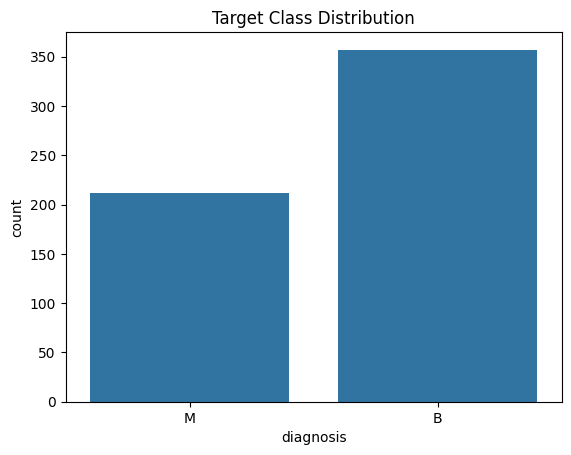

In [12]:
sns.countplot(x='diagnosis', data=df) # Check target distribution
plt.title("Target Class Distribution")
plt.show()

In [13]:
# Encode target (M=Malignant=1, B=Benign=0)
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

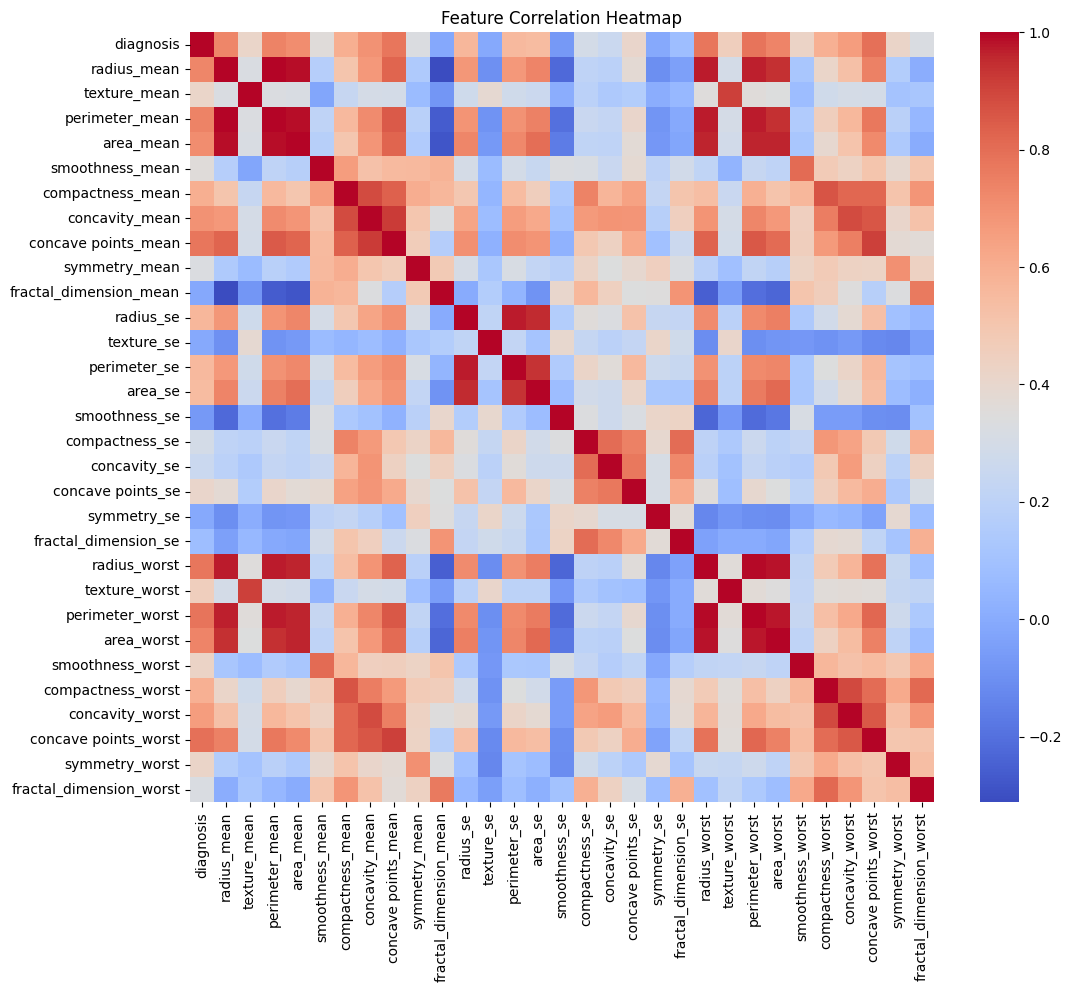

In [14]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [15]:
# Save cleaned dataset
df.to_csv("cleaned_data.csv", index=False)
print("✅ Data cleaned and saved to cleaned_data.csv")

✅ Data cleaned and saved to cleaned_data.csv


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [18]:
df = pd.read_csv("cleaned_data.csv")


In [17]:
# Split features and target
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Predictions
y_pred = model.predict(X_test_scaled)

In [22]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



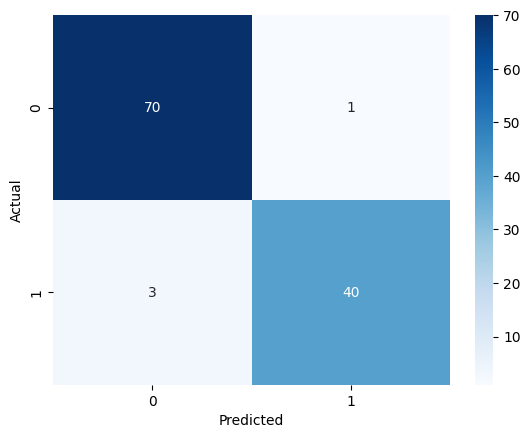

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [24]:
# Create SVM model with default RBF kernel
svm_model = SVC(random_state=42, probability=True)  # probability=True if you want probabilistic outputs

# Train
svm_model.fit(X_train_scaled, y_train)


SVC(probability=True, random_state=42)

SVM Accuracy: 0.9824561403508771
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



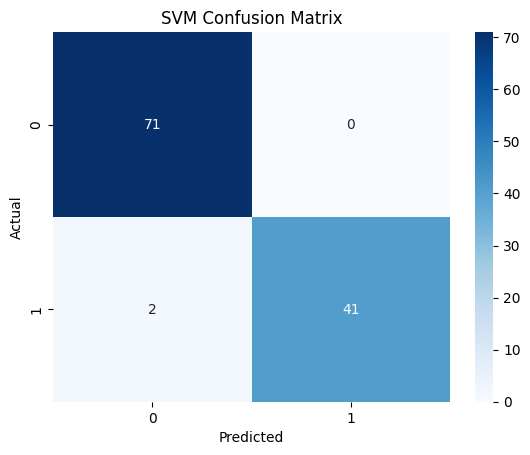

In [26]:
# Predict
y_pred = svm_model.predict(X_test_scaled)

# Accuracy
print("SVM Accuracy:", accuracy_score(y_test, y_pred))

# Detailed report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

grid = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

best_svm = grid.best_estimator_

# Evaluate best model on test set
y_pred_best = best_svm.predict(X_test_scaled)
print("Test Accuracy after tuning:", accuracy_score(y_test, y_pred_best))


Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV accuracy: 0.9758241758241759
Test Accuracy after tuning: 0.9824561403508771


In [28]:
# Save model & scaler
import joblib

joblib.dump(best_svm, "svm_breast_cancer_model.pkl")


['svm_breast_cancer_model.pkl']